In [1]:
import pandas as pd

# Load dataset
file_path = "Home_Guards_Strength_As_On-October_2022.csv"  # Ensure correct path
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,SL. NO.,NAME OF THE DISTRICT,NUMBER OF UNITS,ALLOTTED STRENGTH,NO. OF HOME GUARDS(men),NO. OF HOME GUARDS(women),ACTUAL STRENGTH,VACANCY
0,1,Bengaluru North,18,1850,832,782,1614,236
1,2,Bengaluru Rural,15,1650,846,411,1257,393
2,3,Bengaluru South,15,1850,1136,709,1845,5
3,4,Bagalkote,23,1000,889,96,985,15
4,5,Belagavi,30,1350,1234,61,1295,55


In [2]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Fill or drop missing values
df = df.dropna()  # You can use df.fillna(value) for specific handling

# Check for duplicates and remove them
df = df.drop_duplicates()

# Display summary
df.info()


Missing Values:
 SL. NO.                      0
NAME OF THE DISTRICT         0
NUMBER  OF UNITS             0
ALLOTTED STRENGTH            0
NO. OF HOME GUARDS(men)      0
NO. OF HOME GUARDS(women)    0
ACTUAL STRENGTH              0
VACANCY                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   SL. NO.                    31 non-null     int64 
 1   NAME OF THE DISTRICT       31 non-null     object
 2   NUMBER  OF UNITS           31 non-null     int64 
 3   ALLOTTED STRENGTH          31 non-null     int64 
 4   NO. OF HOME GUARDS(men)    31 non-null     int64 
 5   NO. OF HOME GUARDS(women)  31 non-null     int64 
 6   ACTUAL STRENGTH            31 non-null     int64 
 7   VACANCY                    31 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.1+ KB


In [8]:
# If dataset has a date column, convert and extract parts
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'])
    df['year'] = df['date_column'].dt.year
    df['month'] = df['date_column'].dt.month

# Aggregation Example: Count based on a category column
df_grouped = df.groupby('ACTUAL STRENGTH').size().reset_index(name='count')

df_grouped.head()


,ACTUAL STRENGTH,count
0,252,1
1,429,1
2,480,1
3,517,1
4,536,1


         SL. NO.  NUMBER  OF UNITS  ALLOTTED STRENGTH  \
count  31.000000         31.000000          31.000000   
mean   16.000000         14.064516         967.741935   
std     9.092121          5.999642         363.874701   
min     1.000000          7.000000         500.000000   
25%     8.500000          9.000000         700.000000   
50%    16.000000         14.000000         900.000000   
75%    23.500000         15.000000        1100.000000   
max    31.000000         30.000000        1850.000000   

       NO. OF HOME GUARDS(men)  NO. OF HOME GUARDS(women)  ACTUAL STRENGTH  \
count                31.000000                  31.000000        31.000000   
mean                701.419355                 134.548387       835.967742   
std                 261.681330                 179.939590       362.188025   
min                 193.000000                   0.000000       252.000000   
25%                 532.000000                  57.000000       623.500000   
50%               

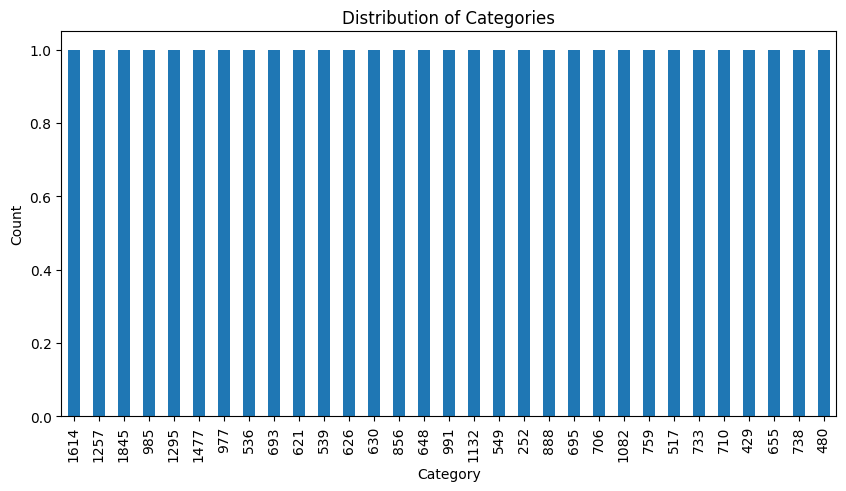

In [10]:
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Example: Bar chart for a categorical column
plt.figure(figsize=(10,5))
df['ACTUAL STRENGTH'].value_counts().plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories")
plt.show()
